In [1]:
# this notebook is for merging data only

# standard libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get the datetime library for date & time calcs
from datetime import datetime, timedelta

In [2]:
# get the revenue table

urlRev = os.path.normpath('C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/ChurnModelFiles/custRevenueTable.csv')
revData = pd.read_csv(urlRev)

In [3]:
revData.head()

,Unnamed: 0,CustID,OpenedChecking,EHI,TotAssets,EqiScore,VinScore,Rev2016,Rev2015,Rev2014
0,0,F14,1,48087.0,190891.0,704.0,753.0,0.52,0.00,0.00
1,1,F143,0,41421.0,34675.0,700.0,755.0,1.20,1.32,-30.36
2,2,F538,1,26096.0,19632.0,635.0,691.0,211.02,35.01,0.00
3,3,F879,1,47729.0,320.0,739.0,791.0,0.00,-50.74,1.32
4,4,F1496,1,51707.0,11590.0,651.0,700.0,0.00,10.71,0.00


In [4]:
# get the product table

urlProd = os.path.normpath('C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/ChurnModelFiles/keyProductsRollup.csv')
prodData = pd.read_csv(urlProd)

In [5]:
prodData.head()

,Unnamed: 0,CustID,State,Channel,Age,Cleancuststart,Custyears,Closed,Footprint,NumProducts,Open,OpenAccts,CdiraOpen,CheckingOpen,Credit_CardOpen,InvestmentsOpen,MortgageOpen,SavingsOpen
0,0,F10000,RI,Branch,52.0,1999-11-23,17.073973,1,In,3.0,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,F1000008,CT,Branch,60.0,2001-04-04,15.709589,2,In,6.0,4,4.0,1.0,2.0,0.0,0.0,0.0,1.0
2,2,F100001,PA,Branch,73.0,1993-05-03,23.635616,7,In,14.0,7,7.0,3.0,1.0,0.0,1.0,0.0,0.0
3,3,F1000013,MA,Branch,47.0,2001-04-04,15.709589,5,In,8.0,3,3.0,0.0,1.0,1.0,0.0,1.0,0.0
4,4,F1000030,PA,Branch,56.0,2001-04-04,15.709589,1,In,4.0,3,3.0,0.0,1.0,0.0,0.0,1.0,1.0


In [6]:
# drop the Unnamed: 0 fields

revData = revData.iloc[:,1:]

In [7]:
prodData = prodData.iloc[:,1:]

In [8]:
# check the lengths of each data frame

# revData 1,118,487
# revData.shape[0]

# prodData 978,541
prodData.shape[0]

978541

In [9]:
# test to see if we have to collapse the F numbers

prodRevData = pd.merge(revData, prodData, on = 'CustID')

In [10]:
prodRevData.head()

,CustID,OpenedChecking,EHI,TotAssets,EqiScore,VinScore,Rev2016,Rev2015,Rev2014,State,...,Footprint,NumProducts,Open,OpenAccts,CdiraOpen,CheckingOpen,Credit_CardOpen,InvestmentsOpen,MortgageOpen,SavingsOpen
0,F14,1,48087.0,190891.0,704.0,753.0,0.52,0.00,0.00,MA,...,In,3.0,2,2.0,0.0,1.0,0.0,0.0,0.0,1.0
1,F143,0,41421.0,34675.0,700.0,755.0,1.20,1.32,-30.36,PA,...,In,6.0,5,5.0,0.0,1.0,2.0,0.0,0.0,1.0
2,F538,1,26096.0,19632.0,635.0,691.0,211.02,35.01,0.00,CT,...,In,3.0,2,2.0,0.0,1.0,0.0,0.0,0.0,1.0
3,F879,1,47729.0,320.0,739.0,791.0,0.00,-50.74,1.32,CT,...,In,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F1496,1,51707.0,11590.0,651.0,700.0,0.00,10.71,0.00,CT,...,In,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
prodRevData.shape[0]

936358

In [12]:
os.getcwd()

'C:\\Users\\n846490\\Documents\\Python Scripts\\SurvivalAnalysis'

In [13]:
os.chdir(os.path.normpath('C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/ChurnModelFiles/'))

In [14]:
prodRevData.to_csv('prodRevData.csv')

In [15]:
prodRevData['Closed'].describe()

count    936358.000000
mean          1.548427
std           2.345951
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         214.000000
Name: Closed, dtype: float64

In [24]:
# create a total revenue column

prodRevData['TotRev'] = prodRevData['Rev2014'] + prodRevData['Rev2015'] + prodRevData['Rev2016']

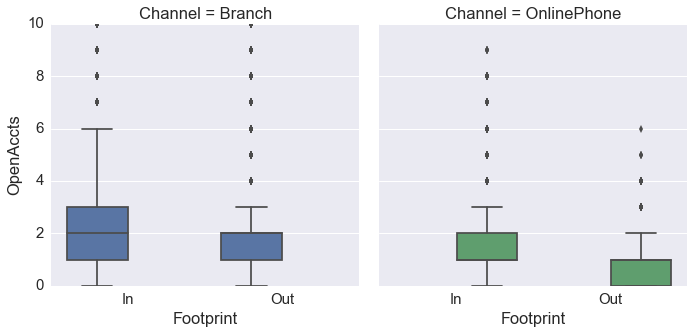

In [19]:
sns.set(font_scale=1.5)

p = sns.factorplot(data = prodRevData, x = 'Footprint', col = 'Channel', y = 'OpenAccts', hue = 'Channel', kind = 'box', size= 5)
p.set(ylim=(0, 10))

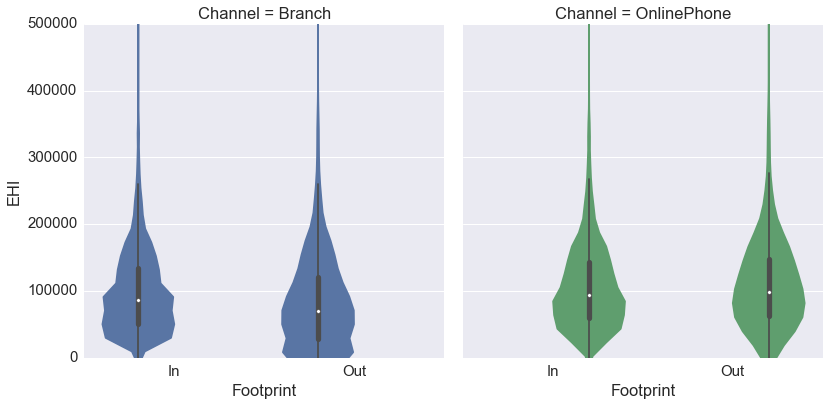

In [22]:

p = sns.factorplot(data = prodRevData, x = 'Footprint', col = 'Channel', y = 'EHI', hue = 'Channel', kind = 'violin', size= 6)
p.set(ylim=(-2, 500000))

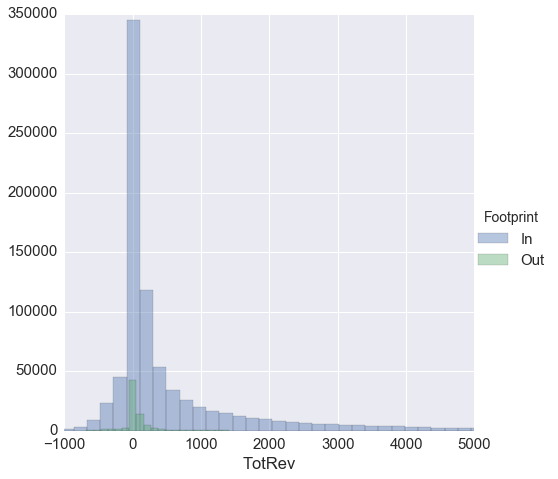

In [35]:
fig = sns.FacetGrid(data=prodRevData, hue='Footprint', size = 7)

fig.map(sns.distplot,'TotRev', bins = 5000, kde = False)

fig.set(xlim=(-1000,5000))

fig.add_legend(title='Footprint')

In [1]:
# zoom in to the center of data

fig = sns.FacetGrid(data=prodRevData, hue='Footprint', size = 7)

fig.map(sns.distplot,'TotRev', kde = False)

fig.set(xlim=(-100,500))

fig.add_legend(title='Footprint')

NameError: name 'sns' is not defined